<a href="https://colab.research.google.com/github/Charishma-Bailapudi/Twitter_Sentiment_Analysis/blob/main/Sentiment_analysis_with_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install required Libraries**

In [1]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Import required Libraries**

In [3]:
import re
import tweepy as tw
from textblob import TextBlob
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Give the neccessary keys and access Tokens to login and perform actions using the twitter api.For more information on how to get the keys and access tokens refer the Readme.md file.


In [5]:
api = ""
secretapi = ""
access_token =""
access_token_secret =""

## **Connect to Twitter API**

In [6]:
try:
    # create OAuthHandler object
    auth = tw.OAuthHandler(api, secretapi)
    # set access token and secret
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets
    api = tw.API(auth)
    print("Authentication Successfull!!!")
except:
    print("Error: Authentication Failed")

Authentication Successfull!!!


In [ ]:
name='CHARISHMA249'
limit=100
tweets=api.user_timeline(screen_name=name,count=limit,tweet_mode='extended')
for tweet in tweets:
  print(tweet.full_text)

## **Fetching tweets**

In [19]:
keyword = 'Crypto Currency'
limit=100
fetched_tweets = tw.Cursor(api.search,q=keyword,count=limit,tweet_mode='extended').items(500)

columns = ['Time','User','Tweet']
data = []
count=0
for tweet in fetched_tweets:
  data.append([tweet.created_at,tweet.user.screen_name,tweet.full_text])

df = pd.DataFrame(data,columns = columns )
df

,Time,User,Tweet
0,2023-01-09 10:42:03,lewieb99test,RT @theartistwade: I’m now excepting crypto cu...
1,2023-01-09 10:41:52,Snabbegoran,RT @GarlandNixon: It's critical that we provid...
2,2023-01-09 10:41:51,LaurenceBSiegel,"@JessicaVaugn If I said bitcoin, I was typing ..."
3,2023-01-09 10:41:07,theartistwade,I’m now excepting crypto currency for payments...
4,2023-01-09 10:40:20,IranalamD,RT @QuokkaSwap: ✅ Public Sale QUOK token ACTIV...
...,...,...,...
495,2023-01-09 04:04:12,Sam34508566,@keattonalgo @JTinvestsInYou Bitcoin (Bsv) is ...
496,2023-01-09 04:03:15,C3MEDIA2,🚨🚨🚨🚨🚨🚨\nCRYPTO CURRENCY CHAT PODCAST EPISODE: ...
497,2023-01-09 04:03:07,CandiceHorbacz,@philthatremains Money is absolutely made of t...
498,2023-01-09 04:02:34,HeizenbergYo,@LayahHeilpern Cash and crypto all depend on h...


## **Data Cleaning**

In [20]:
def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    stop_words = nltk.corpus.stopwords.words('english')
    token=re.sub("RT|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).lower().split()
    filtered_sentence = []
 
    for w in token:
      if w not in stop_words:
        filtered_sentence.append(w)

    text1=" ".join(filtered_sentence)
    return text1


## **Sentiment Analysis**

In [21]:
def get_tweet_sentiment(tweet,parsed_tweet):
    '''
    Function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    parsed_tweet['polarity'] = analysis.sentiment.polarity
    parsed_tweet['subjectivity'] = analysis.sentiment.subjectivity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [30]:
tweets = []
# parsing tweets one by one
fetched_tweets = tw.Cursor(api.search,q=keyword,count=limit,tweet_mode='extended',lang="en").items(500)
for tweet in fetched_tweets:
  # empty dictionary to store required params of a tweet
  parsed_tweet = {}
 
  # saving text of tweet
  parsed_tweet['text'] = clean_tweet(tweet.full_text)
  # saving sentiment of tweet
  parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.full_text,parsed_tweet)
  # appending parsed tweet to tweets list
  if tweet.retweet_count > 0:
    # if tweet has retweets, ensure that it is appended only once
    if parsed_tweet not in tweets:
        tweets.append(parsed_tweet)
  else:
    tweets.append(parsed_tweet)
 
  # return parsed tweets
for i in tweets:
  print(i,"\n")

{'text': 'top stories crypto roundup todaydigital currency group faces us investigationmastercard launches artist accelerator program web3eth developers plan public shanghai testnetchart week btcs yearly performance 20142022', 'polarity': 0.25, 'subjectivity': 0.2833333333333333, 'sentiment': 'positive'} 

{'text': 'critical provide us tax payer funds ukrainian government continue important work p', 'polarity': 0.2, 'subjectivity': 0.9, 'sentiment': 'positive'} 

{'text': 'analysts say reopening country tourism could herald shift currency flows crypto bros beach feel cold wind necks', 'polarity': -0.6, 'subjectivity': 1.0, 'sentiment': 'negative'} 

{'text': 'sliding sterling helps stocks fund managers see dark outlook currency bonds singapore clamps ads highly risky crypto trading', 'polarity': 0.0050000000000000044, 'subjectivity': 0.47, 'sentiment': 'positive'} 

{'text': 'mmm revolution globalget 50 month transaction use crypto currency join', 'polarity': 0.0, 'subjectivity': 0.0, 

In [37]:
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
perc_ptweets = 100*len(ptweets)/len(tweets)
print("Positive tweets percentage: {} %".format(perc_ptweets))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
perc_ntweets = 100*len(ntweets)/len(tweets)
print("Negative tweets percentage: {} %".format(perc_ntweets))
# percentage of neutral tweets
perc_neutweets =100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)
print("Print Nuetral Tweets percentage :{} %".format(perc_neutweets))

Positive tweets percentage: 43.58288770053476 %
Negative tweets percentage: 20.053475935828878 %
Print Nuetral Tweets percentage :36.36363636363637 %


## **Converting into DataFrame**

In [24]:
#coverting dictionary to data frame
df1 = pd.DataFrame.from_dict(tweets)
df1

,text,polarity,subjectivity,sentiment
0,im excepting crypto currency payments original...,0.375000,0.750000,positive
1,critical provide us tax payer funds ukrainian ...,0.200000,0.900000,positive
2,said bitcoin typing drunk something like mean ...,-0.328125,0.646875,negative
3,im excepting crypto currency payments original...,0.375000,0.750000,positive
4,public sale quok token active price ico 0004 m...,-0.066667,0.333333,negative
...,...,...,...,...
367,world marketsjanuary 09 2023world markets glan...,0.087500,0.233333,positive
368,every single banking system exists reason amer...,0.044643,0.161905,positive
369,big like idea crypto currency govt monopoly mi...,0.000000,0.050000,neutral
370,comes recover stolen accounts cryptos guywasab...,0.000000,0.000000,neutral


## **VISUALIZATION**

Text(0, 0.5, 'Frequency')

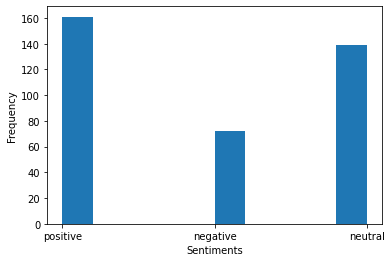

In [25]:
import matplotlib.pyplot as plt
plt.hist(df1['sentiment'])
plt.xlabel('Sentiments')
plt.ylabel('Frequency')

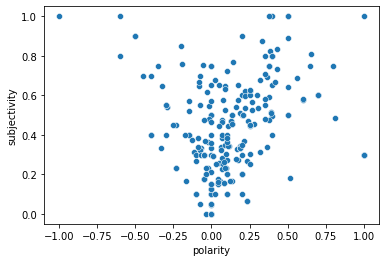

In [26]:
import seaborn as sns
sns.scatterplot(x='polarity',y='subjectivity',data=df1)

In [28]:
df1['sentiment'].value_counts()


positive    161
neutral     139
negative     72
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0b45f77fa0>,
 [Text(-1.0005952104475537, 0.4569564802357176, 'Nuetral'),
  Text(0.5392964371597336, -0.9587279869007775, 'Positive'),
  Text(0.6480577623150336, 0.8888313319765633, 'Negative')],
 [Text(-0.5457792056986657, 0.2492489892194823, '36.36'),
  Text(0.2941616929962183, -0.522942538309515, '43.58'),
  Text(0.35348605217183654, 0.4848170901690344, '20.05')])

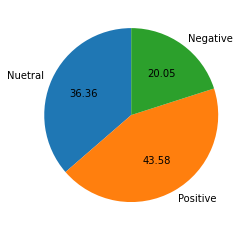

In [38]:
labels = ['Nuetral','Positive','Negative']
values = [perc_neutweets,perc_ptweets,perc_ntweets]
plt.pie(values,labels=labels,startangle=90,autopct='%.2f')

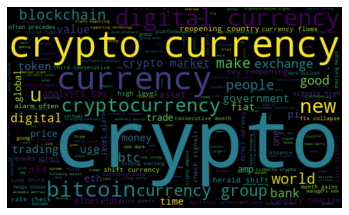

In [35]:
#Create Wordcloud
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in df1['text']])
wordCloud = WordCloud(width =500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()